## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c

# **Równanie Laplace'a**


**Gradient:**

> $\nabla f(x,y) = (\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}) $ - wektor pierwszych pochodnych cząstkowych funkcji 


**Operator Laplace'a:**
> $ \Delta = \nabla \cdot \nabla$ - operator Laplace'a ('laplasjan'), gdzie "$\cdot$" oznacza iloczyn skalarny.

**Równanie Laplace'a:**

> $ \Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} = 0$

Jest równaniem różniczkowym cząstkowym liniowym drugiego rzędu. Funkcje spełniające równanie Laplace'a nazywamy funkcjami harmonicznymi.

**Warto zobaczyć**:

> Jaką postać ma rozwiązanie równania Laplace'a w zmiennych biegunowych: https://www.youtube.com/watch?v=-D4GDdxJrpg

# **ZADANIA**

## **Zadanie 1 - druga pochodna cząstkowa**

Niech:

>## $\frac{\partial ^+f(x)}{\partial x} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} $

>## $\frac{\partial ^-f(x)}{\partial x} = \lim_{h \to 0} \frac{f(x) - f(x-h)}{h} $

 Pokaż, że:
 
 ## $ \frac{\partial^2f(x)}{\partial x^2} = \lim_{h \to 0} \frac{1}{h^2}\left( f(x+h) - 2f(x) +f(x-h) \right)$ . 

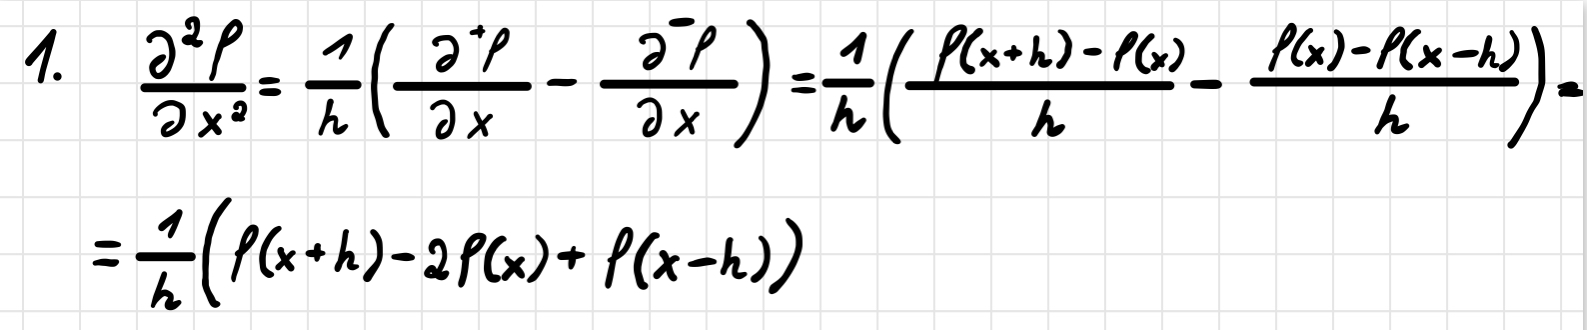

## **Zadanie 2 - Laplasjan na siatce 2d**


Rozważmy płaszczyznę podzieloną na punkty zgodnie z poniższym rysunkiem. 

Wówczas:

### $\frac{\partial ^+T}{\partial x} (i,j) = \frac{1}{\triangle x}\left( T_{i+1,j} - T_{i,j} \right)$

oraz 

### $\frac{\partial ^-T}{\partial x} (i,j) = \frac{1}{\triangle x}\left( T_{i,j} - T_{i-1,j} \right)$

Zakładając, że $\triangle x = \triangle y = 1$ wyprowadź wzór na $\Delta T$ w punkcie $(i,j)$.

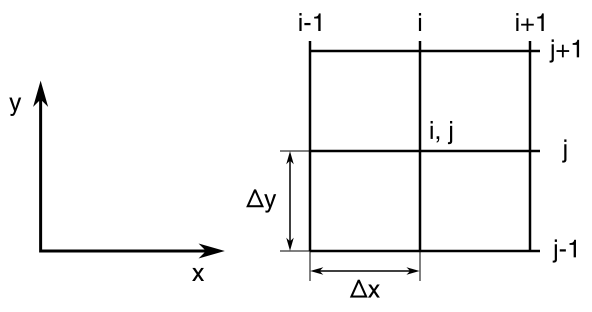

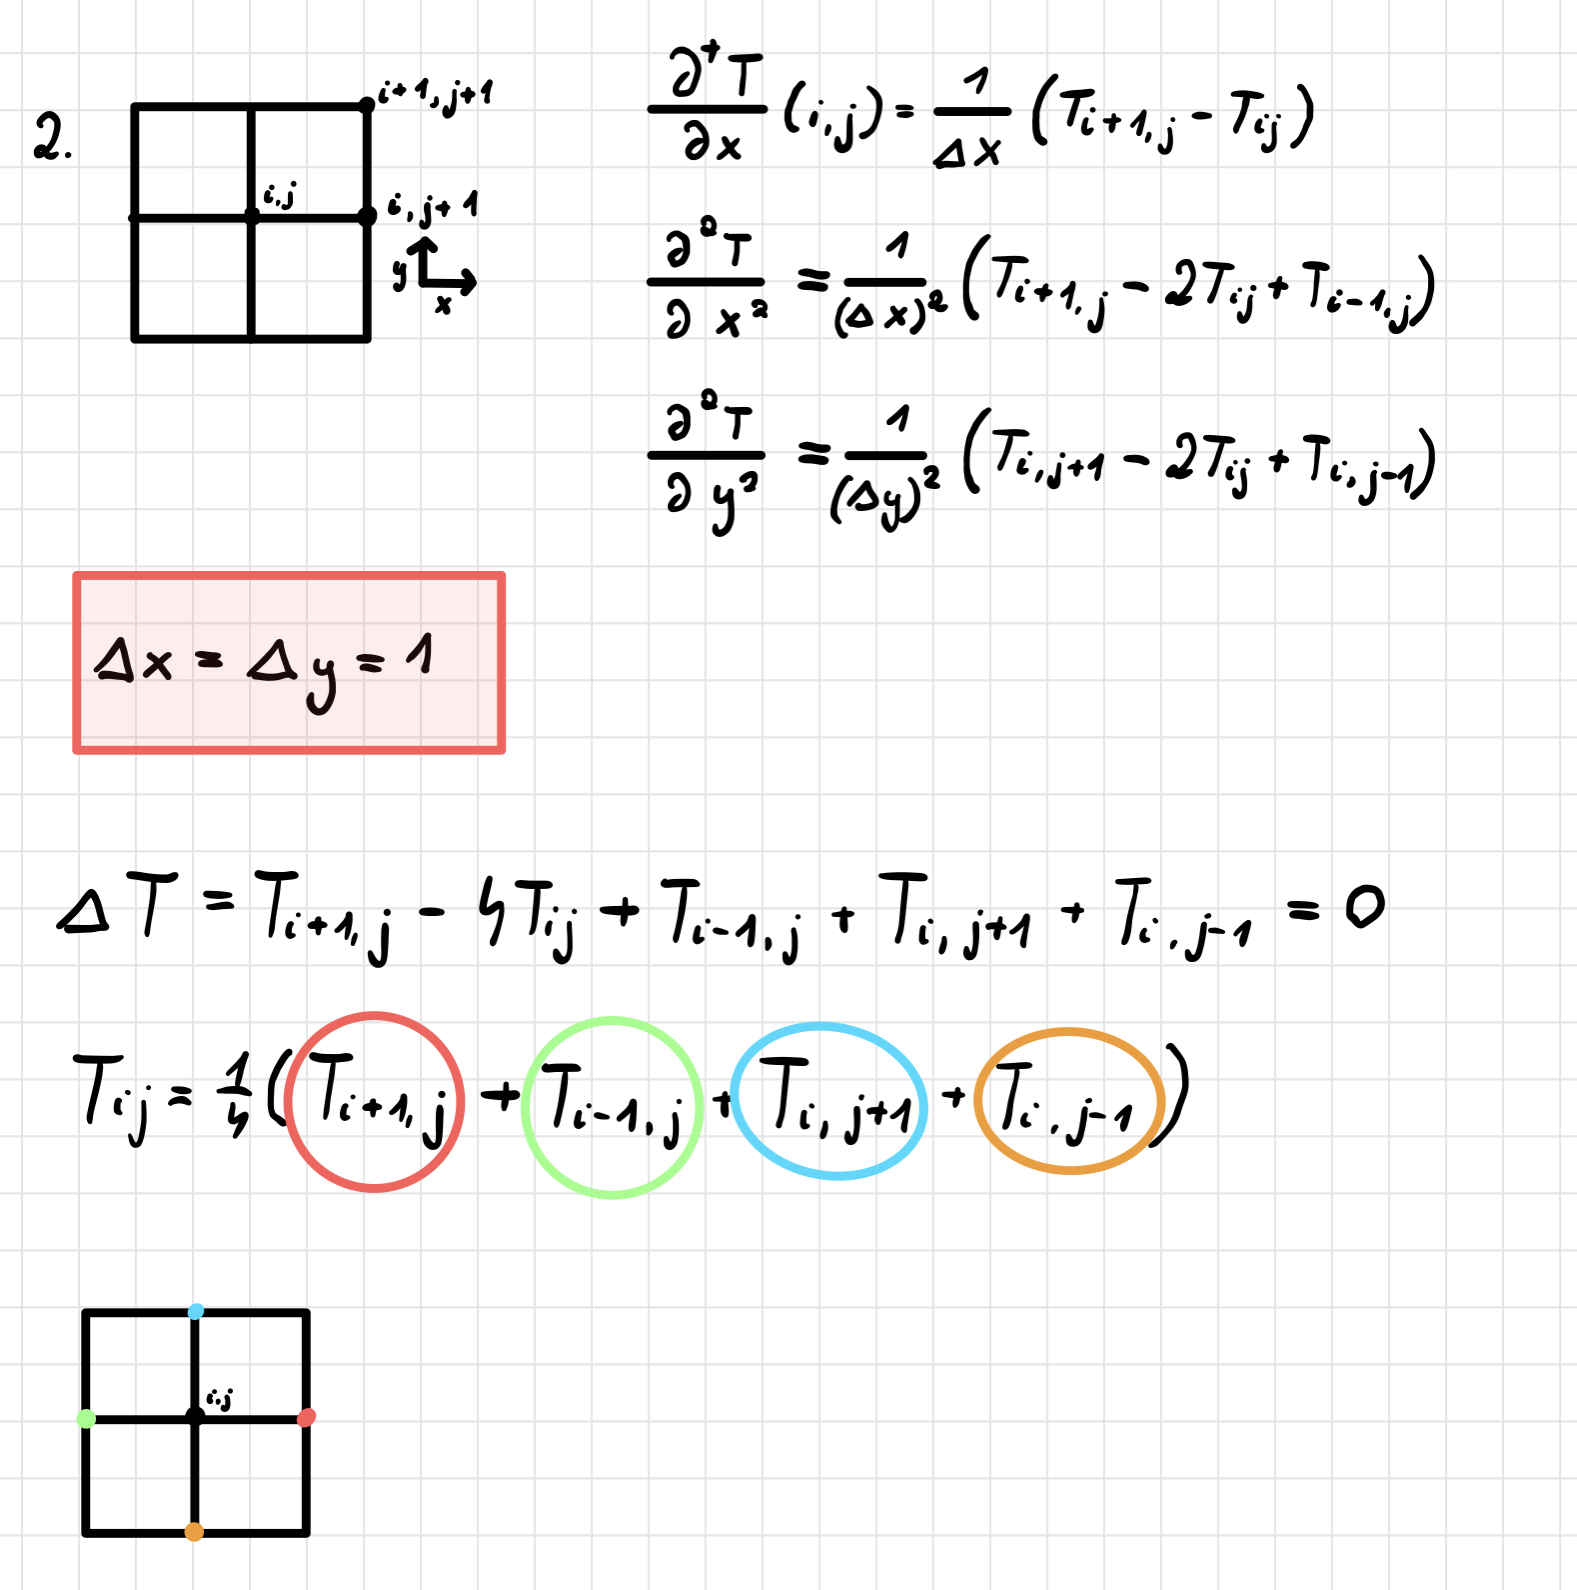

## **Zadanie 3 - Równania Laplace'a na siatce 2d**

Dla siatku z rysunku poniżej wyprowadź wzory na temperatury w pierwszym wierszu i w pierwszej kolumnie siatki. Jako warunki brzegowe przyjmij takie jak na rysunku, tzn. `Tbottom = Tleft = Tright = 0, Ttop = 100`

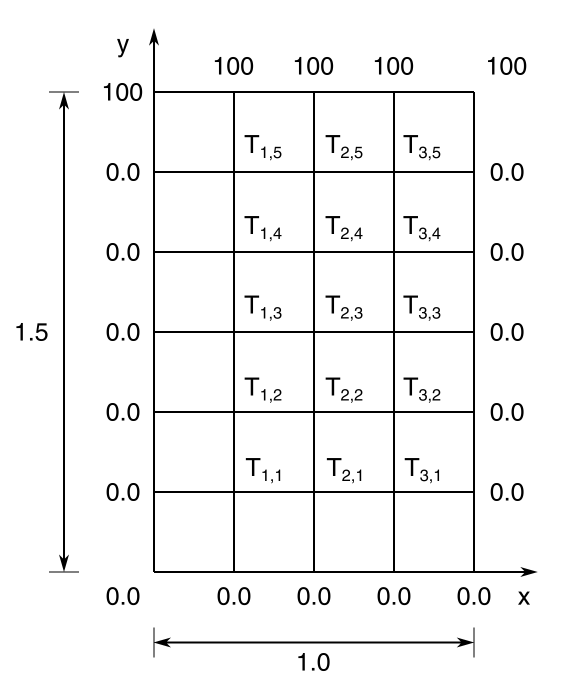

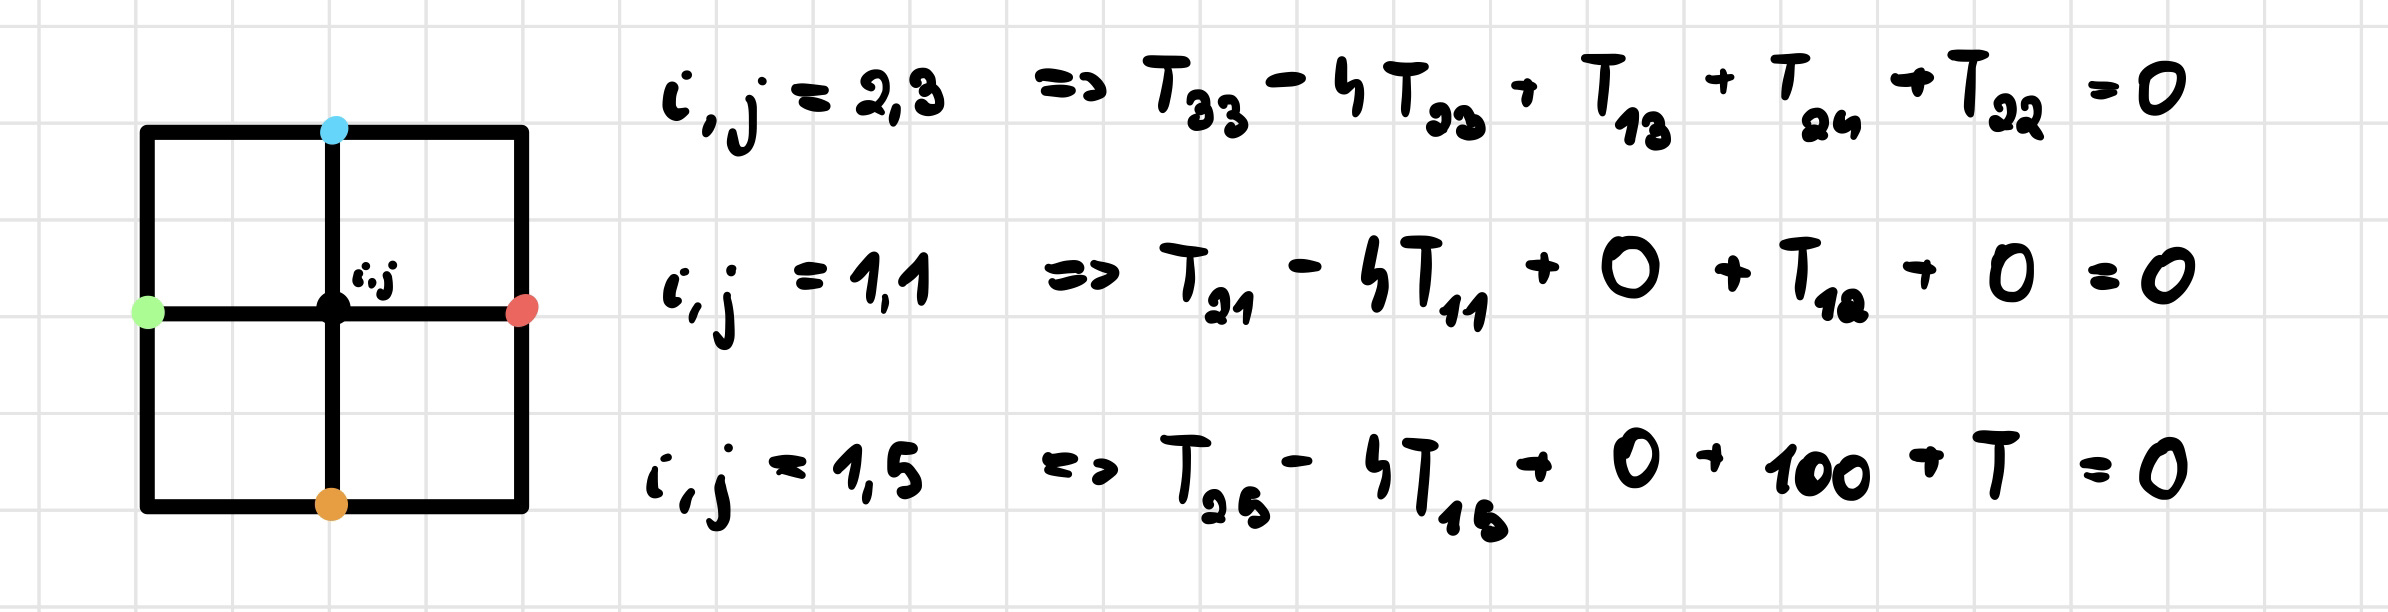

## **Model rozchodzenia się ciepła**

Poniższy kod rozwiązuje równanie Laplace'a na siatce kwadratowej. Rozmiary siatki w kierunkach x oraz y są inne, dlatego aby zachować równe odległości pomiędzy węzłami przyjęto inna liczbę węzłów w obu kierunkach.


Aby zrozumieć poniższy kod przeczytaj notatki zawarte pliku `PSM-LABO11` albo opis jego twórców:

https://folk.ntnu.no/leifh/teaching/tkt4140/._main055.html



W poniższym kodzie rozwiązywane jest równanie Laplace'a w postaci macierzowej: ${\bf A \cdot T} = {\bf b}$:

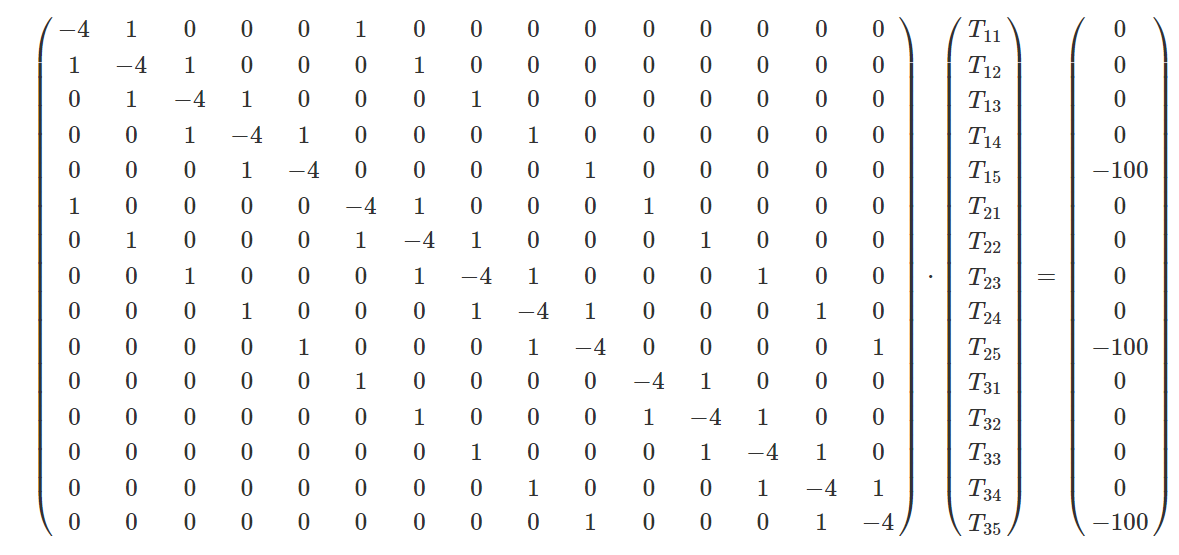

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib
import matplotlib.pylab as plt
import time
from math import sinh

# Ustaw temperatury na brzegach płytki
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0

# Ustaw rozmiar płytki
xmax=1.0
ymax=1.5
 
# liczba wezłów w kierunku x
Nx = 10

# Wyliczamy liczbę węzłów w kierunku y tak, żeby odległość między nimi
# była taka sama jak między węzłami w kierunku x
h = xmax/Nx
Ny = int(ymax/h)

nx = Nx-1
ny = Ny-1
n = (nx)*(ny) 

print('Liczba wszystkich niewiadomych (rozmiar macierzy A)', n)
print('Liczba niewiadomych w kierunku x', nx)
print('Liczba niewiadomych w kierunku y', ny)

Liczba wszystkich niewiadomych (rozmiar macierzy A) 126
Liczba niewiadomych w kierunku x 9
Liczba niewiadomych w kierunku y 14


In [ ]:
#
# Konstrukcja macierzy A
#

d = np.ones(n) # diagonals
d0 = d*-4
d1 = d[0:-1]
d5 = d[0:-ny]

A = scipy.sparse.diags([d0, d1, d1, d5, d5], [0, 1, -1, ny, -ny], format='csc')


# Zerowanie odpowiednich elementów macierzy A
for k in range(1,nx):
    j = k*(ny)
    i = j - 1
    A[i, j], A[j, i] = 0, 0

#
# konstrukcja wektora b
#

b = np.zeros(n)

b[-ny:]+=-Tright   # ostatnie ny elementow = -Tright       
b[-1]+=-Ttop       # ostatni element =  -Ttop
b[0:ny-1]+=-Tleft  # pierwsze ny elemententow =  -Tleft 
b[0::ny]+=-Tbottom # co ny-ity element = -Tbottom

for k in range(1,nx):
    j = k*(ny)
    i = j - 1
    b[i] = -Ttop

In [ ]:
#
# Rozwiązywanie równania AT=b
#

# sposób I - metoda operująca na macierzach rzadkich
tic=time.time()
theta = scipy.sparse.linalg.spsolve(A,b)
toc=time.time()
print('sparse solver time:',toc-tic)
 
# sposób II - metoda operująca na macierząch gęstych
tic=time.time()
theta2=scipy.linalg.solve(A.toarray(),b)
toc=time.time()
print('linalg solver time:',toc-tic)


sparse solver time: 0.0011415481567382812
linalg solver time: 0.001744985580444336


In [ ]:
#
# Rysowanie
#

x = np.linspace(0, xmax, Nx + 1)
y = np.linspace(0, ymax, Ny + 1)
X, Y = np.meshgrid(x, y)

T = np.zeros_like(X)

# wpisanie warunków brzegowych
T[-1,:] = Ttop
T[0,:] = Tbottom
T[:,0] = Tleft
T[:,-1] = Tright

# wpisanie w tablicę T wyznaczonego rozwiązania
for j in range(1,ny+1):
    for i in range(1, nx + 1):
        T[j, i] = theta[j + (i-1)*ny - 1]


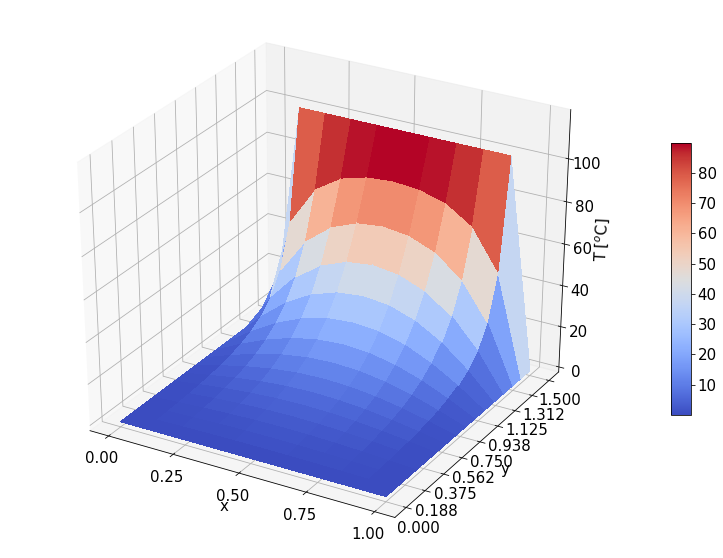

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
LNWDT=2; FNT=15
plt.rcParams['lines.linewidth'] = LNWDT; plt.rcParams['font.size'] = FNT

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, Ttop+20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T [$^o$C]')


nx=4
xticks=np.linspace(0.0,xmax,nx+1)
ax.set_xticks(xticks)

ny=8
yticks=np.linspace(0.0,ymax,ny+1)
ax.set_yticks(yticks)

nTicks=5
dT=int(Ttop/nTicks)
Tticklist=list(range(0,Ttop+1,dT))
ax.set_zticks(Tticklist)

fig.colorbar(surf, shrink=0.5, aspect=14)
plt.show()

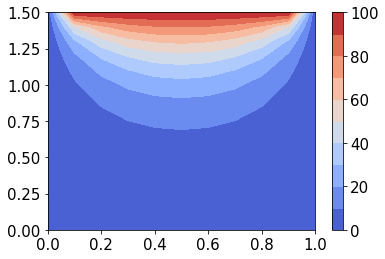

In [ ]:
colorinterpolation = 10
#colourMap = plt.cm.jet
colourMap = plt.cm.coolwarm
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

## **Zadanie 4 (domowe)**

W powyższym kodzie zmodyfikuj warunki brzegowe i rozmiar siatki tak, by rozwiązany został przypadek opisany w notatkach, w pliku `PSM_LABO11`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib
import matplotlib.pylab as plt
import time
from math import sinh

# Ustaw temperatury na brzegach płytki
Ttop = 200
Tbottom = 150
Tleft = 100
Tright = 50

# Ustaw rozmiar płytki
xmax=15.0
ymax=20.0

# liczba wezłów w kierunku x
Nx = 56

# Wyliczamy liczbę węzłów w kierunku y tak, żeby odległość między nimi
# była taka sama jak między węzłami w kierunku x
h = xmax/Nx
Ny = int(ymax/h)

nx = Nx-1
ny = Ny-1
n = (nx)*(ny) 

print('Liczba wszystkich niewiadomych (rozmiar macierzy A)', n)
print('Liczba niewiadomych w kierunku x', nx)
print('Liczba niewiadomych w kierunku y', ny)

Liczba wszystkich niewiadomych (rozmiar macierzy A) 4015
Liczba niewiadomych w kierunku x 55
Liczba niewiadomych w kierunku y 73


In [ ]:
#
# Konstrukcja macierzy A
#

d = np.ones(n) # diagonals
d0 = d*-4
d1 = d[0:-1]
d5 = d[0:-ny]

A = scipy.sparse.diags([d0, d1, d1, d5, d5], [0, 1, -1, ny, -ny], format='csc')


# Zerowanie odpowiednich elementów macierzy A
for k in range(1,nx):
    j = k*(ny)
    i = j - 1
    A[i, j], A[j, i] = 0, 0

#
# konstrukcja wektora b
#

b = np.zeros(n)

b[-ny:]+=-Tright   # ostatnie ny elementow = -Tright       
b[-1]+=-Ttop       # ostatni element =  -Ttop
b[0:ny-1]+=-Tleft  # pierwsze ny elemententow =  -Tleft 
b[0::ny]+=-Tbottom # co ny-ity element = -Tbottom

for k in range(1,nx):
    j = k*(ny)
    i = j - 1
    b[i] = -Ttop

In [ ]:
#
# Rozwiązywanie równania AT=b
#

# sposób I - metoda operująca na macierzach rzadkich
tic=time.time()
theta = scipy.sparse.linalg.spsolve(A,b)
toc=time.time()
print('sparse solver time:',toc-tic)
 
# sposób II - metoda operująca na macierząch gęstych
tic=time.time()
theta2=scipy.linalg.solve(A.toarray(),b)
toc=time.time()
print('linalg solver time:',toc-tic)


sparse solver time: 0.023732423782348633
linalg solver time: 0.9321410655975342


In [ ]:
#
# Rysowanie
#

x = np.linspace(0, xmax, Nx + 1)
y = np.linspace(0, ymax, Ny + 1)
X, Y = np.meshgrid(x, y)

T = np.zeros_like(X)

# wpisanie warunków brzegowych
T[-1,:] = Ttop
T[0,:] = Tbottom
T[:,0] = Tleft
T[:,-1] = Tright

# wpisanie w tablicę T wyznaczonego rozwiązania
for j in range(1,ny+1):
    for i in range(1, nx + 1):
        T[j, i] = theta[j + (i-1)*ny - 1]


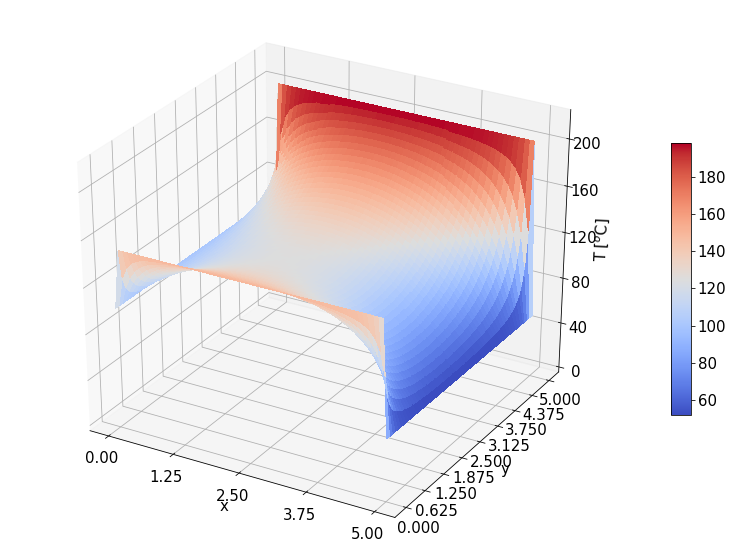

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
LNWDT=2; FNT=15
plt.rcParams['lines.linewidth'] = LNWDT; plt.rcParams['font.size'] = FNT

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, Ttop+20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T [$^o$C]')


nx=4
xticks=np.linspace(0.0,xmax,nx+1)
ax.set_xticks(xticks)

ny=8
yticks=np.linspace(0.0,ymax,ny+1)
ax.set_yticks(yticks)

nTicks=5
dT=int(Ttop/nTicks)
Tticklist=list(range(0,Ttop+1,dT))
ax.set_zticks(Tticklist)

fig.colorbar(surf, shrink=0.5, aspect=14)
plt.show()

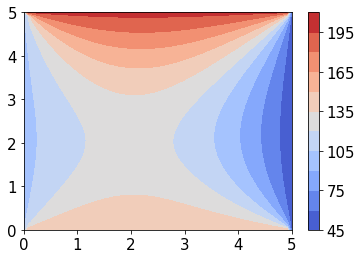

In [ ]:
colorinterpolation = 10
#colourMap = plt.cm.jet
colourMap = plt.cm.coolwarm
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

## **Zadanie 5 (domowe)**

Wykonaj powyższy kod kilkukrotnie i narysuj jak zmienia się czas wyznaczania rozwiązania w przypadku macierzy rzadkich i gęstych w zależności od rozmiaru macierzy.

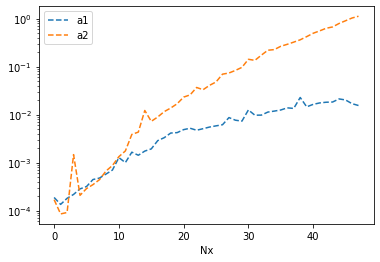

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib
import matplotlib.pylab as plt
import time
from math import sinh

Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0

xmax=1.0
ymax=1.5

a1 = []
a2 = []

for Nx in range(2, 50):  

  h = xmax/Nx
  Ny = int(ymax/h)

  nx = Nx-1
  ny = Ny-1
  n = (nx)*(ny) 


  d = np.ones(n) # diagonals
  d0 = d*-4
  d1 = d[0:-1]
  d5 = d[0:-ny]

  A = scipy.sparse.diags([d0, d1, d1, d5, d5], [0, 1, -1, ny, -ny], format='csc')


  for k in range(1,nx):
      j = k*(ny)
      i = j - 1
      A[i, j], A[j, i] = 0, 0

  b = np.zeros(n)

  b[-ny:]+=-Tright   # ostatnie ny elementow = -Tright       
  b[-1]+=-Ttop       # ostatni element =  -Ttop
  b[0:ny-1]+=-Tleft  # pierwsze ny elemententow =  -Tleft 
  b[0::ny]+=-Tbottom # co ny-ity element = -Tbottom

  for k in range(1,nx):
      j = k*(ny)
      i = j - 1
      b[i] = -Ttop


  tic=time.time()
  theta = scipy.sparse.linalg.spsolve(A,b)
  toc=time.time()
  a1.append(toc-tic)
 
  tic=time.time()
  theta2=scipy.linalg.solve(A.toarray(),b)
  toc=time.time()
  a2.append(toc-tic)


plt.figure(1)
plt.semilogy(a1, "--", label="a1")
plt.semilogy(a2, "--", label="a2")
plt.xlabel("Nx")
plt.legend()
plt.show()


## **Zadanie 6 (domowe)**

Zmodyfikuj powyższy kod tak, żeby zamiast na całej długości brzegu można było zadać wartość temperatury w jednym punkcie, a w pozostałych była ona równa zero.

## **Zadanie 7 (domowe dla chętnych)**

Porównaj rozwiązanie analityczne (równanie 6.26 na tej [stronie](https://folk.ntnu.no/leifh/teaching/tkt4140/._main055.html)) z wynikiem numerycznym. Jak poprawić dokładność wyniku numerycznego?